<a href="https://colab.research.google.com/github/kimqkr4/submission/blob/main/homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [5]:
x = train_data.iloc[:, 1:]  # pixel columns
y = train_data.iloc[:, 0]   # label

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

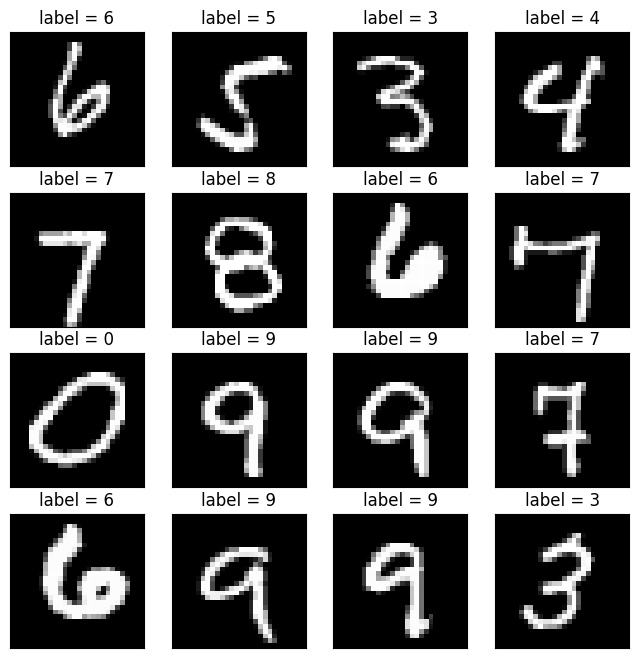

In [7]:
fig, ax = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        ax[i, j].imshow(x_train.iloc[idx].values.reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f'label = {y_train.iloc[idx]}')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.show()


In [8]:
clf = LogisticRegression(
    C=1.0, class_weight=None, dual=False, fit_intercept=True,
    intercept_scaling=1, l1_ratio=None, max_iter=100,
    multi_class='multinomial', n_jobs=None, penalty='l2',
    random_state=None, solver='lbfgs', tol=0.001,
    verbose=0, warm_start=False
)
clf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', tol=0.001)

In [9]:
y_val_pred = clf.predict(x_val)
print("Model accuracy is %0.3f" % accuracy_score(y_val, y_val_pred))

Model accuracy is 0.918


Correctly predicted images:


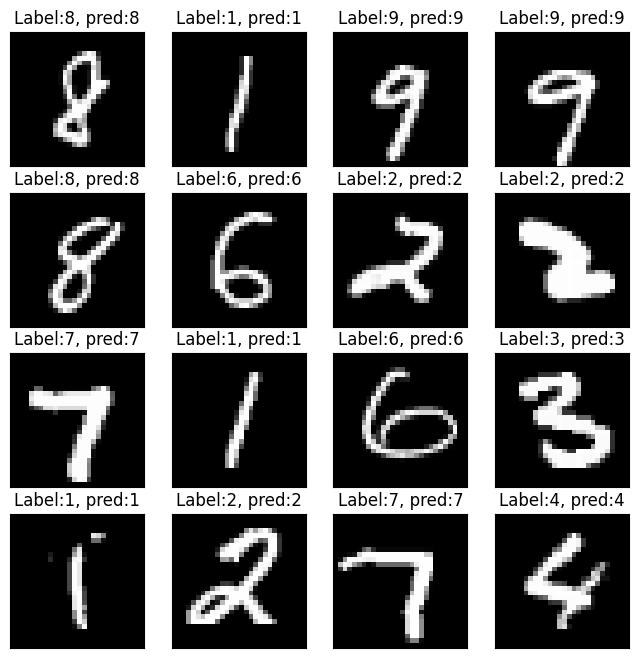

In [10]:
print("Correctly predicted images:")
correct_idx = (y_val == y_val_pred)
x_val_correct = x_val[correct_idx]
y_val_correct = y_val[correct_idx]
y_val_pred_correct = y_val_pred[correct_idx]

fig, ax = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        ax[i, j].imshow(x_val_correct.iloc[idx].values.reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f'Label:{y_val_correct.iloc[idx]}, pred:{y_val_pred_correct[idx]}')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.show()

Incorrectly predicted images:


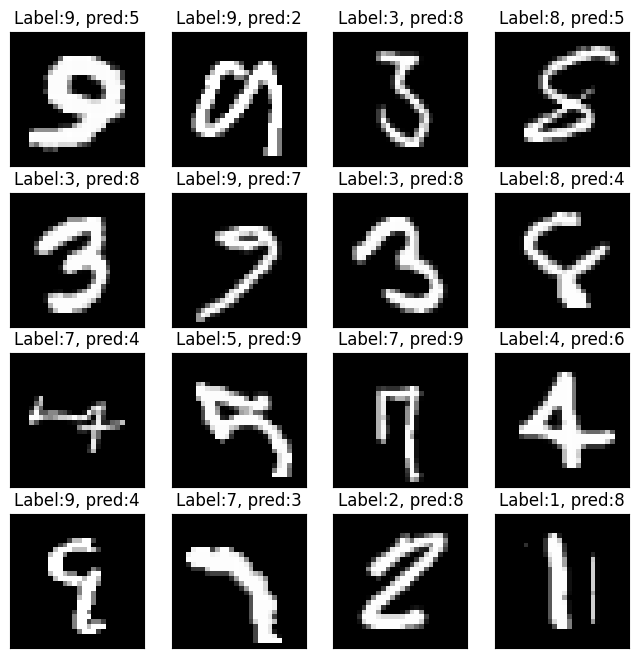

In [11]:
print("Incorrectly predicted images:")
incorrect_idx = (y_val != y_val_pred)
x_val_incorrect = x_val[incorrect_idx]
y_val_incorrect = y_val[incorrect_idx]
y_val_pred_incorrect = y_val_pred[incorrect_idx]

fig, ax = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        ax[i, j].imshow(x_val_incorrect.iloc[idx].values.reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f'Label:{y_val_incorrect.iloc[idx]}, pred:{y_val_pred_incorrect[idx]}')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.show()

In [12]:
x_test = test_data
preds = clf.predict(x_test)

In [14]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')
sample_submission['Label'] = preds
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv', index=False)